# Code Functionality

This code takes nodes as input , connects the consecutive nodes to form elements. Then assembles the global stiffness matrix . This code is considers 3 DOF at each node but can be extended to 6 DOF considering rotations. The user can input forces at node and define the BC. The code then solves and outputs the displacements and reaction forces

Modification to previous version

*   Forces as class
*   BC as class



In [37]:
import numpy as np
import matplotlib.pyplot as plt


In [38]:
#------------------------CLASS NODE-----------------------------------

class Node:

  def __init__(self,x,y,z): ##inputs 3 coordinates
    self.coord=np.array([x,y,z])

#------------------------CLASS ELEMENT-----------------------------------
## creates one-D element from the coordinates and plots
class element:
  global dof #number of degrees pf freedom for rach node
  dof=3 #number of degrees of freedom per node
  def __init__(self,node_1,node_2,stiffness,area):
    self.node1=node_1
    self.node2=node_2
    self.E=stiffness
    self.A=area
    self.dof = dof # Assign dof to instance attribute

    self.L,self.n=self.cal_length()
    self.k_local=self.local_stiffness()

    # print('\n')
    # print(f"Local k matrix size:{self.dof*2}")
    # print('\n')
    # print(f"local stiffness matrix:\n {self.k_local}")
    # print('\n')
    # # self.plot_ele()


#-----------------function to calculate the dimensions--------------
  def cal_length(self):
      L_vec=self.node1.coord-self.node2.coord #difference between coordinate
      length=np.linalg.norm(L_vec) ##length magnitude
      norm_L=L_vec/length ##direction cosine
      return length, norm_L

   ##--------assembling global stiffness matrix--------
  def local_stiffness(self):

    total_dof = self.dof *2 #number of degrees of freedom per node multiplied ny total number of nodes
    k = np.zeros((total_dof, total_dof))
    k_local = self.E * self.A / self.L * np.outer(self.n, self.n)
        # 2-node local matrix because considers only one element
    k = np.zeros((total_dof, total_dof))
    k[:self.dof, :self.dof] = k_local
    k[:self.dof, self.dof:] = -k_local
    k[self.dof:, :self.dof] = -k_local
    k[self.dof:, self.dof:] = k_local
    return k


In [39]:
class structure:

  def __init__(self,nodes,elements):
    self.nodes=nodes
    self.elements=elements
    self.dof = dof # Assign dof to instance attribute
    self.n_dof=len(nodes)*self.dof
    self.K_global=np.zeros((self.n_dof,self.n_dof))
    self.F=np.zeros(self.n_dof)
    self.U=np.zeros(self.n_dof)
    self.k_global=self.assemble_global_stiffness(self.dof)


    print("\n")
    #print(f"the force applied is :{self.forceapplied}")
    # print(f"Size of global stiffness matrix is :\n {self.k_global.shape}")
    # print("\n")
    print(f"global stiffness matrix is :\n {self.k_global}")
  def assemble_global_stiffness(self, m=dof):
    for elem in self.elements:
        k = elem.k_local
        i = self.nodes.index(elem.node1)
        j = self.nodes.index(elem.node2)
        dof_lo = [i*m + r for r in range(m)] + [j*m + r for r in range(m)]
        for a in range(2*m):
            for b in range(2*m):
                self.K_global[dof_lo[a], dof_lo[b]] += k[a, b]
    return self.K_global

  def apply_force(self, node_id, fx=0,fy=0,fz=0):
        self.F[node_id*dof] += fx
        self.F[node_id*dof + 1] += fy
        self.F[node_id*dof + 2] += fz
        return print(f"\n input force is :{self.F}\n")

  def apply_boundary_condition(self, fixed_dof):
        self.fixed_dof = fixed_dof

  def solve(self):
        all_dof = np.arange(self.K_global.shape[0])
        free_dof = np.setdiff1d(all_dof, self.fixed_dof)
        K=self.K_global
        K_ff = K[np.ix_(free_dof, free_dof)]
        F_f = self.F[free_dof]
        U_f = np.linalg.solve(K_ff, F_f)
        self.U[free_dof] = U_f
        self.R = K.dot(self.U) - self.F
        return self.U, self.R
        #return print(f"all dof :{all_dof}"),print(f"free dof :{free_dof}")


## Function to plot graph

In [88]:
# Collect undeformed coordinates
def plot_graph(nodes,U):
  x_undeformed = [node.coord[0] for node in nodes]
  y_undeformed = [node.coord[1] for node in nodes]
  z_undeformed = [node.coord[2] for node in nodes]

  scale=1e5
  x_deformed = []
  y_deformed = []
  z_deformed = []

  for i, node in enumerate(nodes):
    # u has 3 DOFs per node (X,Y,Z)
    ux = U[i*3]
    uy = U[i*3 + 1]
    uz = U[i*3 + 2] # uncomment if needed

    x_deformed.append(node.coord[0] + scale*ux)
    y_deformed.append(node.coord[1] + scale*uy)
    z_deformed.append(node.coord[2] + scale*uz) # uncomment if needed
  return x_undeformed,y_undeformed,z_undeformed,x_deformed,y_deformed,z_deformed

##  input values 1



global stiffness matrix is :
 [[ 7.e+07  0.e+00  0.e+00 -7.e+07  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00
   0.e+00  0.e+00  0.e+00]
 [ 0.e+00  7.e+07  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00
   0.e+00 -7.e+07  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00
   0.e+00  0.e+00  0.e+00]
 [-7.e+07  0.e+00  0.e+00  7.e+07  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00
   0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  2.e+09  0.e+00  0.e+00 -2.e+09  0.e+00
   0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00
   0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  7.e+07  0.e+00  0.e+00
  -7.e+07  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00 -2.e+09  0.e+00  0.e+00  2.e+09  0.e+00
   0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00
   0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00 -7.e+07  

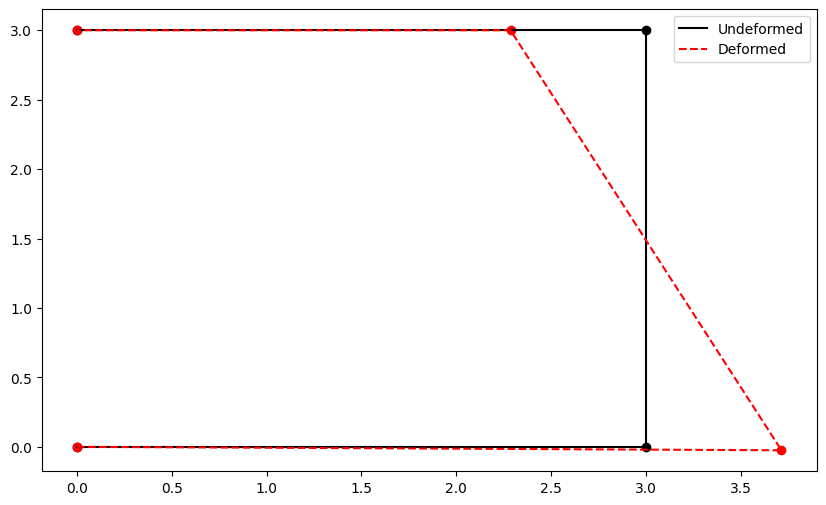

In [89]:

## input nodes
n1 =Node(0,0,0)
n2 =Node(3,0,0)
n3=Node(3,3,0)
n4=Node(0,3,0)
nodes=[n1,n2,n3,n4]
## create elements by connecting the nodes

e1 = element(n1,n2, 210e9, 0.001)
e2 = element(n2,n3, 10e9, 0.6)
e3 = element(n3,n4, 210e9, 0.001)
e4 = element(n4,n1, 210e9, 0.001)

elements=[e1,e2,e3,e4]

model=structure(nodes,elements)

# # Assemble stiffness
K = model.assemble_global_stiffness()

# Apply loads
model.apply_force(2, fx=-1000)  # Fx at Node 3
model.apply_force(1, fx=1000)  # Fx at Node 2
model.apply_force(1, fy=-1000)  # Fx at Node 2
# Apply boundary conditions (fix Node 1)
model.apply_boundary_condition([0,1,2,5,7,8,9,11])

# Solve
U,R=model.solve()



print("\n Displacements:\n", U)
print("\n Reactions:\n", R)

x_undeformed,y_undeformed,z_undeformed,x_deformed,y_deformed,z_deformed=plot_graph(nodes,U)
plt.figure(figsize=(10, 6))
plt.plot(x_undeformed, y_undeformed, 'k-', label='Undeformed')
plt.scatter(x_undeformed, y_undeformed, c='k')

plt.plot(x_deformed, y_deformed, 'r--', label='Deformed')
plt.scatter(x_deformed, y_deformed, c='r')
plt.legend()
plt.show()

# Input values 2



global stiffness matrix is :
 [[ 7.00e+08  0.00e+00  0.00e+00 -7.00e+08  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [-7.00e+08  0.00e+00  0.00e+00  1.05e+09  0.00e+00  0.00e+00 -3.50e+08
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 -3.50e+08  0.00e+00  0.00e+00  3.50e+08
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]]

 input force is :[    0.     0.     0.     0.     0.     0. -1000.     0.     0.]


 Displacements:
 [ 0.000000

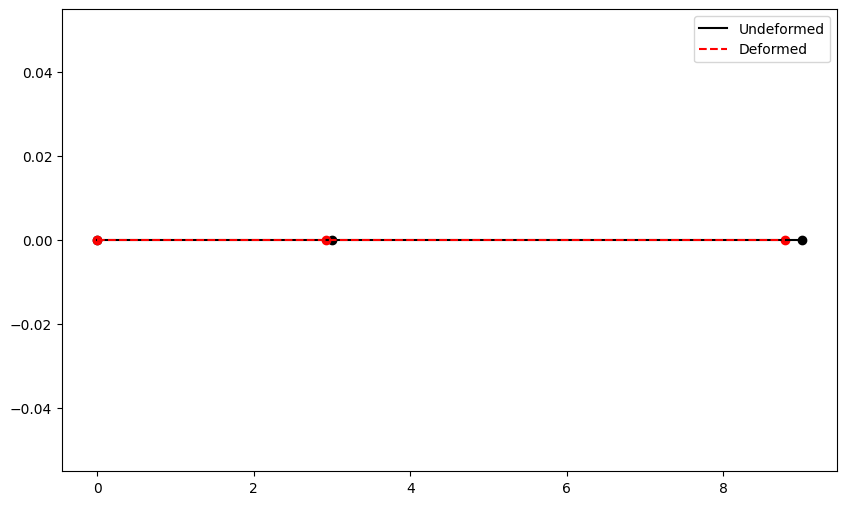

In [70]:

## input nodes
n1 =Node(0,0,0)
n2 =Node(3,0,0)
n3=Node(9,0,0)

nodes=[n1,n2,n3]
## create elements by connecting the nodes

e1 = element(n1,n2, 210e9, 0.01)
e2 = element(n2,n3, 210e9, 0.01)


elements=[e1,e2]

model=structure(nodes,elements)

# # Assemble stiffness
K = model.assemble_global_stiffness()

# Apply loads
model.apply_force(2, fx=-1000)

model.apply_boundary_condition([0,1,2,4,5,7,8])

# Solve
U,R=model.solve()



print("\n Displacements:\n", U)
print("\n Reactions:\n", R)

x_undeformed,y_undeformed,x_deformed,y_deformed=plot_graph(nodes,U)
plt.figure(figsize=(10, 6))
plt.plot(x_undeformed, y_undeformed, 'k-', label='Undeformed')
plt.scatter(x_undeformed, y_undeformed, c='k')

plt.plot(x_deformed, y_deformed, 'r--', label='Deformed')
plt.scatter(x_deformed, y_deformed, c='r')
plt.legend()
plt.show()

# Input 3



global stiffness matrix is :
 [[ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  7.e+08  0.e+00  0.e+00 -7.e+08  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00]
 [ 0.e+00 -7.e+08  0.e+00  0.e+00  7.e+08  0.e+00]
 [ 0.e+00  0.e+00  0.e+00  0.e+00  0.e+00  0.e+00]]

 input force is :[    0.     0.     0.     0. -1000.     0.]


 Displacements:
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.14285714e-07  0.00000000e+00]

 Reactions:
 [   0. 1000.    0.    0.    0.    0.]


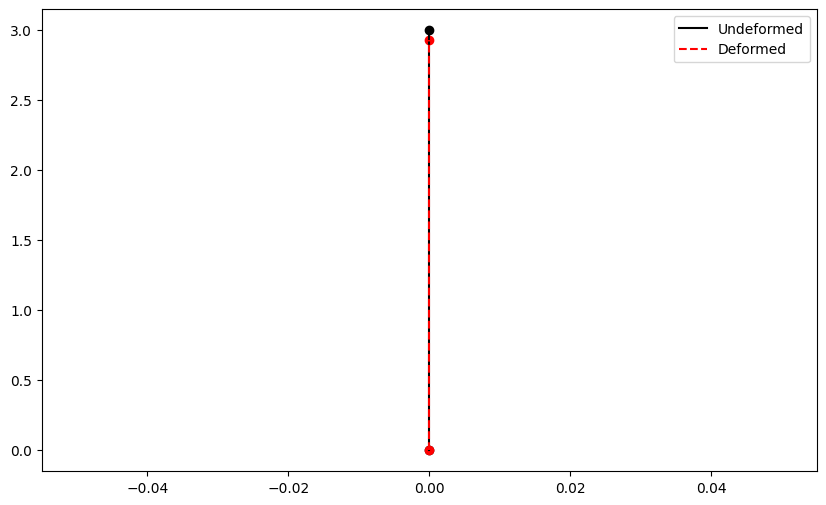

In [79]:

## input nodes
n1 =Node(0,0,0)
n2 =Node(0,3,0)


nodes=[n1,n2]
## create elements by connecting the nodes

e1 = element(n1,n2, 210e9, 0.01)
e2 = element(n2,n3, 210e9, 0.01)


elements=[e1]

model=structure(nodes,elements)

# # Assemble stiffness
K = model.assemble_global_stiffness()

# Apply loads
model.apply_force(1, fy=-1000)

model.apply_boundary_condition([0,1,2,3,5])

# Solve
U,R=model.solve()



print("\n Displacements:\n", U)
print("\n Reactions:\n", R)

x_undeformed,y_undeformed,x_deformed,y_deformed=plot_graph(nodes,U)
plt.figure(figsize=(10, 6))
plt.plot(x_undeformed, y_undeformed, 'k-', label='Undeformed')
plt.scatter(x_undeformed, y_undeformed, c='k')

plt.plot(x_deformed, y_deformed, 'r--', label='Deformed')
plt.scatter(x_deformed, y_deformed, c='r')
plt.legend()
plt.show()